# AdaBoost Classifier

<div class="alert alert-block alert-info">
<ul><strong>
<li>MIGUEL DOMINGUEZ</li>
<li>CSC 59929</li>
<li>Machine Learning</li>
<li>Prof. Erik K. Grimmelmann </li>
<li>Date: 10/20/17 </li>
<li>Homework Week 8 </li>
</strong>
</ul>
</div>

<div class="alert alert-block alert-warning">
<h2>Keywords</h2>
<ul>
<li><b>weak learner:</b> a classifier whose results are only slighly correlated with the true classification</li>
<li><b>ensemble method:</b> technique used to combine classifiers into a meta-classifier which is better than each classifier alone</li>
<li><b>boosting:</b> an ensemble method used to reduce variance and bias in supervised learning</li>
</ul>
</div>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator 
from matplotlib.colors import ListedColormap
from IPython.display import Image
%matplotlib inline
import graphviz 
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from astropy.table import Table, Column

## Discussion and Results:

<div class="alert alert-block alert-success"> In this assigment, we learn about ensemble methods and how to apply them. We focus on boosting which is an ensemble method that reduces variance and bias in supervised learning. The idea of ensemble methods is to use certain number of classifiers to combine them all into an ultimate meta-classifer which has overcome the weaknesses of each individual classifier. In other words, it is a generalized classifier. <br> <br> We use the Iris Dataset to experiment with. All features are standardized for our results. As well, we split the data into training and testing data. <br> <br>We will compare how a single Decision Tree and the AdaBoost Classifier work. We will use trees of depth from 1 to 7. For each model we collect the error and accuracy values. Finally we plot them.<br> <br>The AdaBoost combines 500 Decision Trees for each depth. Each tree will fail to classify some feature values into the correct classes. But the algorithm makes the incorrectly classified points heaving in terms of weights, and the ones that are correct are lighter. THINK OF EACH DESION TREE AS A WEAK LEARNER. The AdaBoost uses the weaknesses of each weak learned to further improve a vast model capable of classifying data into the correct class.<br> <br><strong> Our results show that our a single Decison Tree of Depth 1, we obtain an accuracy of 69%. But for 500 Decison Trees combined in the AdaBoost Classifier, each tree contributing to a better classification, depth 1, we obtain an accuracy of 96%.</strong> The same occurs for depth 2 for both the single Decision Tree and the AdaBoost Classifier. However, at depth 3, the single Decision Tree has learned a lot more and is decent enough to handle the data, using the AdaBoost Classifier gives us the same results. This builds an important point. <strong>The AdaBoost Classifier is useful only when we have lots of weak learners. If given strong, accurale learners, we would waste our time combining many learners that are good enough by themselves.</strong> <br> <br> In the real world, perhaps working with big data and data storehouses, using the AdaBoost Classifier might be very expensive in terms of computational cost. This indicates that we should always conside efficient algorithms that do the same but are less expensive. But this also open our eyes to always look for things that can learn from others.</div>

In [39]:
#Obtain Iris Dataset and save it to a Pandas Frame
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#Rename columns
new_columns = ['Sepal Length [0]', 'Sepal Width [1]', 'Petal Length [2]', 'Petal Width [3]','Class']
iris.columns = new_columns
iris.head()

,Sepal Length [0],Sepal Width [1],Petal Length [2],Petal Width [3],Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
#We use all 3 flower clases (SVV means Setosa & Versicolor & Virginica)
SVV = iris.iloc[:,:].values

#Standardize the features
for i in range(0,4):
    SVV[:,i] = (SVV[:,i] - SVV[:,i].mean()) / SVV[:,i].std()   

#Samples    
X = SVV[:,0:4]    

#Get class vector
y = SVV[:,4]
for i in range(0,len(y)):
    if y[i] == 'Iris-setosa':
        y[i] = 0
    elif y[i] == 'Iris-versicolor':
         y[i] = 1
    else:
         y[i] = 2
#Convert Y to list
y = y.tolist()

In [41]:
# Split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.30, random_state=0)

In [42]:
# Fit for various depth trees
MaxDepth = 7
Depth = np.zeros(MaxDepth)
ErrorsTree = np.zeros((MaxDepth,2))
ErrorsAda  = np.zeros((MaxDepth,2))

AccuracyTree = np.zeros((MaxDepth,2))
AccuracyAda  = np.zeros((MaxDepth,2))

for i in range(0,MaxDepth):
    Depth[i] = i + 1
    
    #Create decision tree and adaboost models
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1)
    ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)
    
    tree = tree.fit(X_train, y_train)
    
    #Error and Accuracy for Decision Tree
    ErrorsTree[i,0] = 1 - tree.score(X_train,y_train)
    ErrorsTree[i,1] = 1 - tree.score(X_test,y_test)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    AccuracyTree[i,0] = accuracy_score(y_train, y_train_pred)
    AccuracyTree[i,1] = accuracy_score(y_test, y_test_pred)
    
    ada = ada.fit(X_train, y_train)
    
    #Error and Accuracy for AdaBoost Classifier
    ErrorsAda[i,0] = 1 - ada.score(X_train,y_train)
    ErrorsAda[i,1] = 1 - ada.score(X_test,y_test)
    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    AccuracyAda[i,0] = accuracy_score(y_train, y_train_pred)
    AccuracyAda[i,1] = accuracy_score(y_test, y_test_pred)

In [43]:
#Build tables for Decision Tree and AdaBoost Classifier results

tableTree = Table([Depth, ErrorsTree[:,0], ErrorsTree[:,1], AccuracyTree[:,0],AccuracyTree[:,1]], 
              names =('Depth','Error Training','Error Test', 'Accuracy Training','Accuracy Test'))

tableAda  = Table([Depth, ErrorsAda[:,0], ErrorsAda[:,1], AccuracyAda[:,0],AccuracyAda[:,1]], 
              names =('Depth','Error Training','Error Test', 'Accuracy Training','Accuracy Test'))


## Table of Decision Tree results

In [44]:
tableTree

Depth,Error Training,Error Test,Accuracy Training,Accuracy Test
float64,float64,float64,float64,float64
1.0,0.304761904762,0.4,0.695238095238,0.6
2.0,0.0380952380952,0.0888888888889,0.961904761905,0.911111111111
3.0,0.0190476190476,0.0222222222222,0.980952380952,0.977777777778
4.0,0.0,0.0222222222222,1.0,0.977777777778
5.0,0.0,0.0222222222222,1.0,0.977777777778
6.0,0.0,0.0222222222222,1.0,0.977777777778
7.0,0.0,0.0222222222222,1.0,0.977777777778


## Table of AdaBoost Classifier results

In [45]:
tableAda

Depth,Error Training,Error Test,Accuracy Training,Accuracy Test
float64,float64,float64,float64,float64
1.0,0.0380952380952,0.111111111111,0.961904761905,0.888888888889
2.0,0.0,0.0222222222222,1.0,0.977777777778
3.0,0.0,0.0222222222222,1.0,0.977777777778
4.0,0.0,0.0222222222222,1.0,0.977777777778
5.0,0.0,0.0222222222222,1.0,0.977777777778
6.0,0.0,0.0222222222222,1.0,0.977777777778
7.0,0.0,0.0222222222222,1.0,0.977777777778


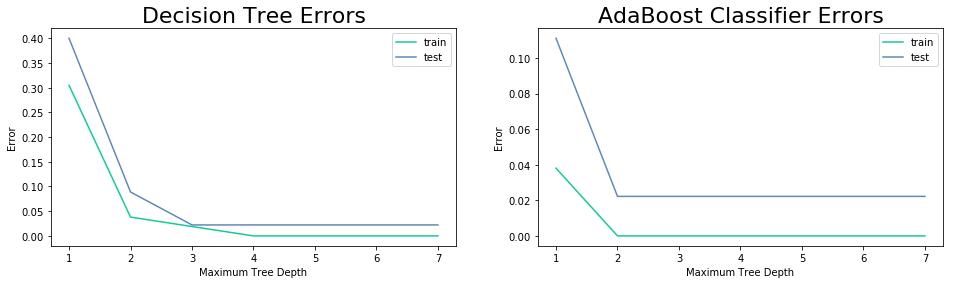

In [46]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,4))
for i,error, til in zip([0,1],[ErrorsTree,ErrorsAda],['Decision Tree Errors','AdaBoost Classifier Errors']):
    ax[i].set_xlabel('Maximum Tree Depth')
    ax[i].set_ylabel('Error')
    ax[i].set_title(til, fontsize =22)
    ax[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[i].plot(np.arange(1,MaxDepth+1),error[:,0], label='train', color='#12CC94')
    ax[i].plot(np.arange(1,MaxDepth+1),error[:,1], label='test', color='#6088BB')
    ax[i].legend(loc='upper right', fontsize='medium')
plt.show() 

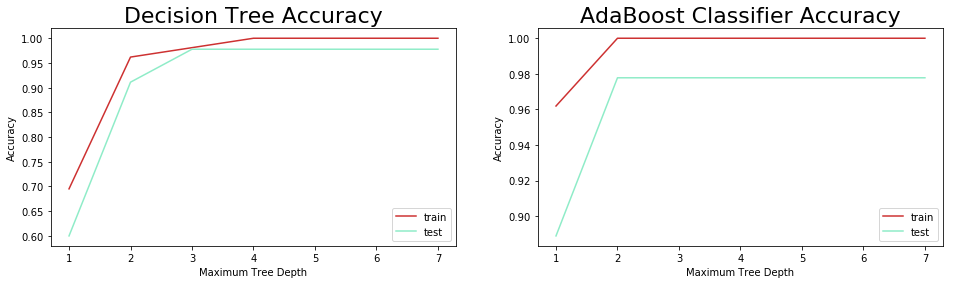

In [47]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,4))
for i,accu, til in zip([0,1],[AccuracyTree,AccuracyAda],['Decision Tree Accuracy','AdaBoost Classifier Accuracy']):
    ax[i].set_xlabel('Maximum Tree Depth')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(til, fontsize =22)
    ax[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[i].plot(np.arange(1,MaxDepth+1),accu[:,0], label='train', color='#CD3131')
    ax[i].plot(np.arange(1,MaxDepth+1),accu[:,1], label='test', color='#8FECC8')
    ax[i].legend(loc='lower right', fontsize='medium')
plt.show() 